In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def createNoise(n):
    r = np.random.normal(0,1,pow(n,2))
    maxr = max(r)
    minr = min(r)
    rnorm = [510*(i-minr)/(maxr-minr)-255 for i in r]
    noise = [[rnorm[(j-1)*n+i] for j in range(n)] for i in range(n)]
    return noise

def isVisible(x):
    n = len(x)
    if n <= 2:
        return True
    return all([x[k] < x[0]+k/(n-1)*(x[n-1]-x[0]) for k in range(1,n-1)])

def visibilityGraph(I):
    n = len(I)
    edges1=[]
    edges2=[]
    for i in range(n):
        for j in range(n):
            for k in range(1,n-j):
                if isVisible([I[i][j+l] for l in range(k+1)]):
                    edges1.append((i,j))
                    edges2.append((i,j+k))
            for k in range(1,n-i):
                if isVisible([I[i+l][j] for l in range(k)]):
                    edges1.append((i,j))
                    edges2.append((i+k,j))
            for k in range(1,n-max(i,j)):
                if isVisible([I[i+l][j+l] for l in range(k)]):
                    edges1.append((i,j))
                    edges2.append((i+k,j+k))
            for k in range(1,n-max(i,n-j)):
                if isVisible([I[i+l][j-l] for l in range(k)]):
                    edges1.append((i,j))
                    edges2.append((i+k,j-k))
    return edges1, edges2

def weightMat(n,edges1,edges2):
    M = [[1]*n]*n
    edges = edges1 + edges2
    for (i,j) in edges:
        M[i][j] = M[i][j] + 1
    return M

def addNoise(image,noise,coeff):
    return np.clip([[z+coeff*w for (z,w) in zip(x,y)] for (x, y) in zip(image,noise)],0,255)

def flatten(xss):
    return [x for xs in xss for x in xs]

In [22]:
boatIm = Image.open('boat64.png')
boat = np.array(boatIm).tolist()
n = len(boat)
noise = createNoise(n)
noiseCoeff = 0.5
boatNoise = addNoise(boat,noise,noiseCoeff)

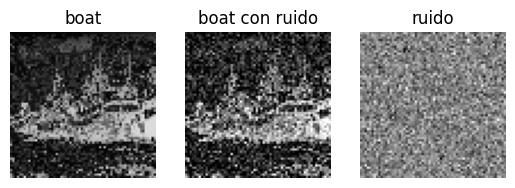

In [13]:
plt.subplot(1,3,1)
plt.imshow(boat, cmap='gray',vmin=0,vmax=255)
plt.title('boat')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(boatNoise, cmap='gray',vmin=0,vmax=255)
plt.title('boat con ruido')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(noise, cmap='gray',vmin=-255,vmax=255)
plt.title('ruido')
plt.axis('off')

plt.show()

In [24]:
boat1,boat2 = visibilityGraph(boat)
boatNoise1,boatNoise2 = visibilityGraph(boatNoise)
noise1,noise2 = visibilityGraph(noise)

boatMat = weightMat(n,boat1,boat2)
boatNoiseMat = weightMat(n,boatNoise1,boatNoise2)
noiseMat = weightMat(n,noise1,noise2)

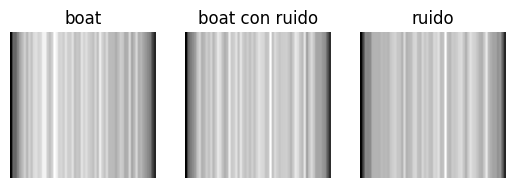

In [25]:
plt.subplot(1,3,1)
plt.imshow(boatIVG, cmap='gray',vmin=0,vmax=255)
plt.title('boat')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(boatNoiseIVG, cmap='gray',vmin=0,vmax=255)
plt.title('boat con ruido')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(noise, cmap='gray',vmin=0,vmax=255)
plt.title('ruido')
plt.axis('off')

plt.show()

In [23]:
# histogramas
# más imágenes
# diagonales
# comparar ivg:
# · ruido blanco
# · imágenes sin ruido
# · imágenes con ruido

# Optimizaciones
# · Eliminar boole y utilizar solo vgBool
# · Calcular primero grafo y luego matriz
# · Quitar duplicados (i,j)